![Cloud-First](../image/CloudFirst.png)

# SIT742: Modern Data Science
**(Module: Big Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)


Prepared by **SIT742 Teaching Team**

---


## Session 5E: Association Rule Mining

## Apriori Algorithm for Association Rule Mining

Association Rule Learning is a prominent area of Data Mining.
From a given transcation dataset, the goal is to find a pattern among different items in transactions.
This means investigating, to what extent does purchasing a item A leads to purchasing item B. On one hand,
it helps the customer finding the items associated with eahc in a store. On the other hand, salesperson can
use this information and place associated items together to escalate sales. <br/>
One way for Association Rule Learning is Apriori Algorithm.
Apriori algorithm uses 2 concepts from Association Rule Mining: <br/>
    -Support <br/>
    -Confidence

We will briefly discuss the two below.

### Support

For a transaction dataset T, Support is the proportion of the transactions that contain both the item A and B. <br/>
Support (AB) = P(A $ \cup $ B)

### Confidence

For a transaction dataset T, Confidence is the percentage of transactions in T, containing A and that also contain B. In other words, this is the probability of B in T given that A is already in that transaction. <br/> Confidence (A $ \rightarrow $ B) = P(B | A)

## Apiori Algorithm

Apiori Algorithm is a Association Rule learning Algorithm and is used to find frequent itemsets and relevant association rules. By frequent itemsets we should think of items who are frequently associated with each other within the whole dataset. In order for a frequent itemset to be valid the subsets of the itemset needs to be frequent by themselves, this is called anti-monotonicity or downward-closure poperty. The anti-monotonicity guarantees a efficient search, this is necessary because the algorithm goes through all combinations adding one at a time. The process of adding one at a time is called buttom up approach.

### `apyori` Package

In this part, we will use the `apyori` package.

Here we assume a simple transaction set, and then the calling of `apriori` is straightforward:

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

transactions = [
    ['beer', 'nuts'],
    ['beer', 'cheese'],
]

rules = apriori(transactions)

# rules = apriori(transactions, min_support = 0.5, min_confidence = 0.7, min_length = 2)


results = list(rules)

In [ ]:
print(results)

In [ ]:
for i in range(len(results)):
    print("##############################################################################")
    print(i)
    print(results[i])
    print(results[i].items)

## Transactions from File

If the transaction set is stored on an external file, we might need to use some code to load it into the proper format:

Consider a file with the following content:
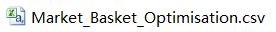
When importing our dataset `Market_Basket_Optimization`, we should add the `header` argument with the value `None`, without this Python places the first row of the dataset as the titles of the columns and we do not want this. If we take a look at the dataframe now we can see that our product names are now located in the first row.




In [ ]:
!pip install wget

In [ ]:
import wget

link_to_data = 'https://github.com/tuliplab/mds/raw/master/Jupyter/data/Market_Basket_Optimisation.csv'
DataSet = wget.download(link_to_data)

In [ ]:
import pandas as pd

# Data Preprocessing
dataset = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
dataset

The next thing is that we will preprocess our data set by placing it in Lists of Lists, we do this using two for loops. The first for loop goes through all the rows (transactions) of the dataset and the second for loop goes through all the products and adds these to a list before appending them to the transactions list. We can see that our dataset is now of the type list and that it's value is indeed a list of products.

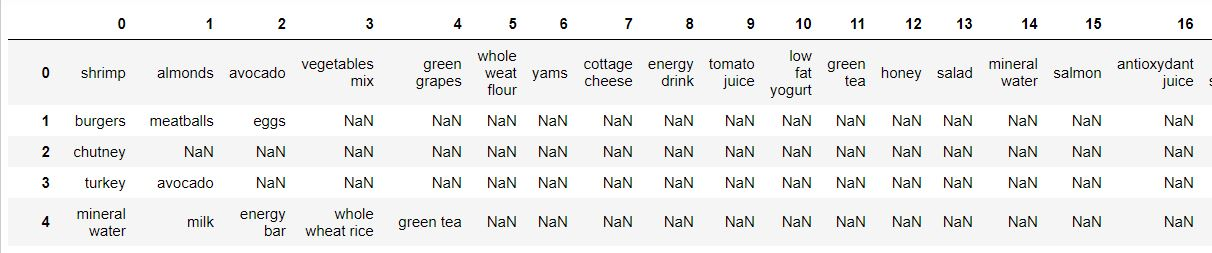


We will not go into details of this code because there are various ways to get to the same result with Python, just note that the second for loop is actually a inner for loop, nested in the append method.

Also note that the `dataset.values[i,j]` is converted to a string value when appended to the transaction list.

In [ ]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0, 20)])
print(transactions)

Before we train our apriori algorithm on the dataset, let's import the apyori.py library which contains the classes we will be using. We will declare a variable called rules since the apriori algorithm takes the transactions list as input and outputs association rules. If we inspect our Apiori function we see it accepts one main argument and that is an iterable object our transactions list. We can also specify the support, confidence and lift thresholds. A new argument which we have not discussed yet is `max_lenght`, maximum length of the itemsets generated. If “None” (default) all possible itemsets lengths (under the apriori condition) are evaluated.Here we assume that the value of max_length is 2.

When deciding on the minimum support we should calculate this in a way that it makes sense according to the problem at hand. We want to optimize the sales for a supermarket, the dataset contains all the transactions made in one week. If we want to have products who are minimally bought 3 times a day our minimum support will be 0.0028. (3*7/7500)

The minimum confidence should prevent that rules are made based on the wrong reasons, there are products who are bought frequently together not because they're strongly associated but because they are frequently bought products independent of each other. We want our rules to be relevant, choosing 0.8 is to high and will give us no results on this dataset, 0.4 will give us irrelevant rules as described earlier, the winner is 0.2 because this confidence minimum gave us relevant rules that were proven true enough times but not too frequent to be irrelevant to our goal. This minimum is found by running the Apriori algorithm different times and checking if the results makes sense.

The lift measurement is a good indication of the relevance of our rules, we will set our minimum lift to 3 because we can be sure that these rules will be significant. Remember that these arguments depends on your dataset or problem. The Apriori is an experimental algorithm, we need to try different threshold and see if the produced rules have the wanted effect in the real world if not than we have to tune our thresholds some more.

In [ ]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, max_length = 2)

# Visualising the results
results = list(rules)

myResults = [list(x) for x in results]


In [ ]:
print(myResults)

In [ ]:
for i in range(len(results)):
    print("##############################################################################")
    print(i)
    print(results[i])
    print(results[i].items)

### Limitations
As you can see the Apriori algorithm is way more efficient than the naive approach because it generates less candidates to test. However, multiple passes through the database are necessary which is not optimal. And particularly the **second pass is computationally intensive** because the set of candidates to test is the longest. This means that for each transaction, each candidate in the set need to be tested.... The second algorithm we will cover tries to address this problem specifically.

### Using mlxtend library on Apriori mining

mlxtend is another library supporting on Apriori mining.
Most of the time it requires to have transaction data ready with transaction product matrix format (see below image).


In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# Get the transactions as list
All_transactions = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]


In [ ]:
# Transform it as transaction product matrix dataframe
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(All_transactions).transform(All_transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

In [ ]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets

In [ ]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)